<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_6_SRAL_SSHA.ipynb"><< SRAL sea surface height anomalies</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_8_SRAL_WS.ipynb">SRAL wind speed >></a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2024 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT), Vinca Rosmorduc (CLS)

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fsensors%2Flearn-sral/HEAD?urlpath=%2Ftree%2F1_SRAL_introductory%2F1_7_SRAL_SWH.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://jupyterhub-wekeo.apps.eumetsat.dpi.wekeo.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/learn-sral/1_SRAL_introductory/1_7_SRAL_SWH.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg?style=flat&logo=" alt="Open in WEkEO"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>    
</html>

<div class="alert alert-block alert-success">
<h3>Learn SRAL: Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
The following modules are prerequisites for this notebook, and will retrieve the data required here.
  - **<a href="./1_1a_SRAL_data_access_Data_Store.ipynb" target="_blank">1_1a_SRAL_data_access_Data_Store.ipynb</a>** if using the Data Store for data access
    <br><br>**OR**<br><br>
  - **<a href="./1_1b_SRAL_data_access_HDA.ipynb" target="_blank">1_1b_SRAL_data_access_HDA.ipynb</a>** if using WEkEO for data access
    
</div>
<hr>

# 1.7 SRAL significant wave height 


### Data used

| Product Description  | Data Store collection ID| Product Navigator | WEkEO HDA ID | WEkEO metadata |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:--------:|
| Sentinel-3 SRAL level-2 | EO:EUM:DAT:0415 | <a href="https://navigator.eumetsat.int/product/EO:EUM:DAT:SENTINEL-3:SR_2_WAT___NTC?query=SRAL&s=advanced" target="_blank">link</a> | EO:EUM:DAT:SENTINEL-3:SR_2_WAT___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3ASR_2_WAT___" target="_blank">link</a>|

### Learning outcomes

At the end of this notebook you will know;
* How to read significant wave height data from Sentinel-3 level-2 altimetry files.
* How plot significant wave height data using appropriate flags.

### Outline

The signals obtained from satellite altimetry measurements contain information not just about the mean sea-level over time, but also information on the roughness of the current sea surface as a result of wave activity. As such, the significant wave height can be derived - this is defined as "the average wave height, from trough to crest, of the highest one-third of the waves". It is derived from the leading edge slope of the altimetry waveform. In general a smaller leading edge slope is related to higher significant wave height.

In this notebook, we'll take a look at how to plot this data from a Sentinel-3 altimetry level-2 product.

<div class="alert alert-info" role="alert">

## <a id='TOC-TOP'></a>Contents

</div>
    
 1. [Reading SRAL level-2 SWH data](#section1)
 2. [Plotting SRAL level-2 SWH data](#section2)


We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [1]:
import cartopy                       # a library that support mapping
import matplotlib.pyplot as plt      # a library that support plotting
import xarray as xr                  # a library that supports using labelled, multidimensional arrays
import numpy as np                   # a library that provides support for array-based mathematics
import os                            # a library that allows us access to basic operating system commands
import warnings                      # a library that helps us manage warnings
warnings.filterwarnings('ignore')

Lets set a few plot parameters for use throughout this notebook

In [2]:
plt.rcParams.update({'font.size': 12})

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Reading SRAL level-2 SWH data
[Back to top](#TOC-TOP)

</div>

As in the previous notebooks in this series, we will use a Sentinel-3 level-2 altimetry file here. For this instance we only need to open the standard measurement file, as we won't be using the waveforms.

In [3]:
# selecting SAFE directories
SAFE_directory = os.path.join(os.getcwd(), 'products', 
    'S3B_SR_2_WAT____20240206T104925_20240206T113638_20240303T024359_2833_089_208______MAR_O_NT_005.SEN3')
measurement_file = "standard_measurement.nc"

In [4]:
# read data
ds = xr.open_dataset(os.path.join(SAFE_directory, measurement_file))
ds.close()

In preparation for plotting the data, we will also read in the relevant flag information for the significant wave height product. In this case this is the "swh_ocean_qual_01_ku" - you can see from the name (including 'ku') that we will be using the SWH derived from the SAR mode measurements.

In [5]:
flags_swh = np.array(ds.swh_ocean_qual_01_ku).astype(float)
flags_swh[flags_swh != 0.0] = 1.15
flags_swh[flags_swh == 0.0] = np.nan

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Plotting SRAL level-2 SWH data
[Back to top](#TOC-TOP)

</div>

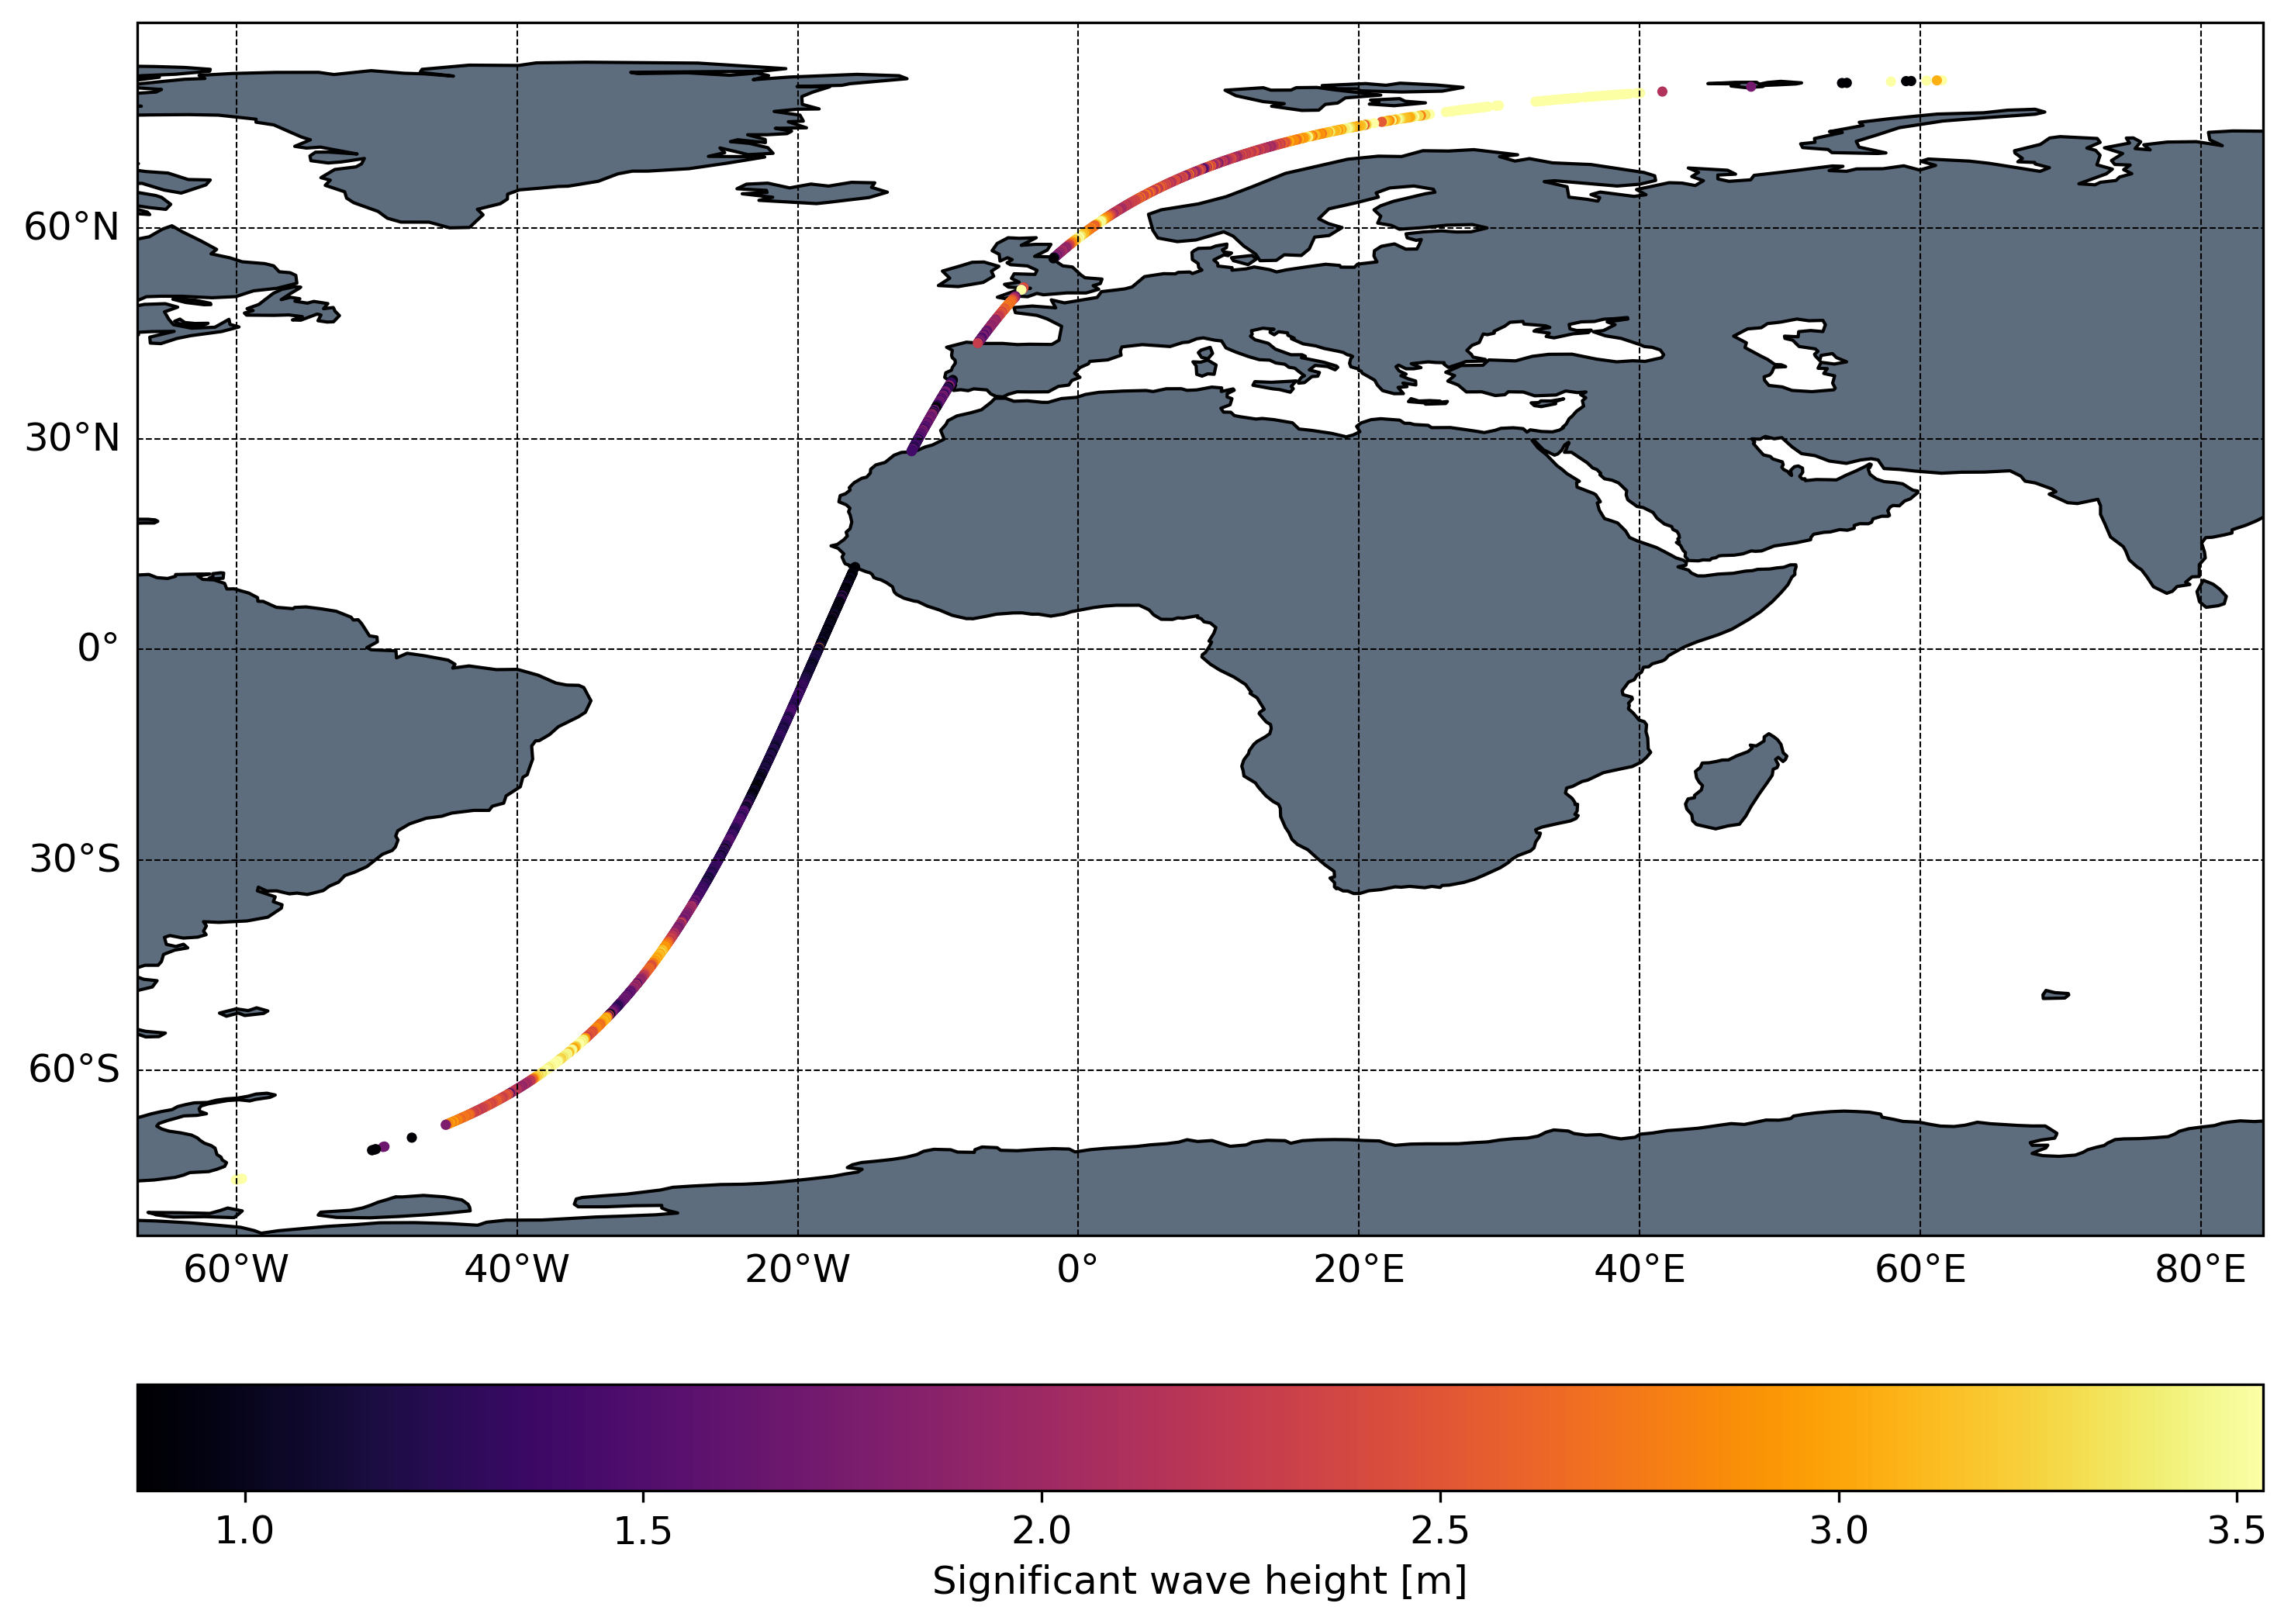

In [6]:
# plot the flagged track data for geophysical variables
fig, m = plt.subplots(1, 1, figsize=(10, 10), dpi=300, subplot_kw={"projection": cartopy.crs.PlateCarree()})

labels = ['Significant wave height [m]']
plot_vars = [ds.swh_ocean_01_ku]
plot_flags = [flags_swh]
cmaps = ["inferno"]

init = True
for label, plot_var, plot_flag, cmap in zip(labels, plot_vars, plot_flags, cmaps):

    vmin = np.nanpercentile(plot_var, 5)
    vmax = np.nanpercentile(plot_var, 95)
    plot_var[plot_flag == 0] = np.nan
    f1 = m.scatter(ds.lon_01, ds.lat_01, c=plot_var, s=10, cmap=cmap, marker='o', edgecolors=None, 
                   linewidth=0.0, vmin=vmin, vmax=vmax)

    m.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='k', facecolor='#5D6D7E')
    g1 = m.gridlines(draw_labels = True, zorder=20, color='0.0', linestyle='--', linewidth=0.5)
    g1.top_labels = False
    g1.right_labels = False
    g1.xlabel_style = {'color': 'black'}
    g1.ylabel_style = {'color': 'black'}
    m.set(facecolor = "1.0")
    m.set_aspect(0.5)
    
    cbar = plt.colorbar(f1, ax=m, orientation="horizontal", fraction=0.05, pad=0.07)
    cbar.set_label(label)

plt.tight_layout()
plt.savefig('1_7_SRAL_SWH.png')

In the figure above you can see that the significant wave height varies along the track. This data is from February, so northern hemisphere winter, and you can see high SWH around the coast of the UK and France - which may be expected given the storms that typically occur at this time of year. You can also see some higher values in the southern ocean around 50-60 degrees south, another area that is typically very windy, and thus often has high wave action. In the next notebook we'll look at how wind speed can be derived from altimetry measurements.

<hr>
<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_6_SRAL_SSHA.ipynb"><< SRAL sea surface height anomalies</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_8_SRAL_WS.ipynb">SRAL wind speed >></a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean" target="_blank">View on GitLab</a> | <a href="https://training.eumetsat.int/" target="_blank">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int target="_blank">Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int target="_blank">Contact our training team to collaborate on and reuse this material</a></span></p>